In [1]:
import numpy as np
import riverswim_class as rs 
import UCRL2_L as ucrl
import UCRL_SMDP as ucrlS
import experiment_utils as utils
import importlib
importlib.reload(rs)
importlib.reload(ucrl)
importlib.reload(utils)
import matplotlib.pyplot as plt

In [2]:
env_smdp = rs.riverswim(nS=15, T_max=3)
env_ucrl = rs.riverswim(nS=15, T_max=1)

ucrl_naive = ucrl.UCRL2(nS=15, nA = 2, delta = 0.05)
smdp_ucrl = ucrlS.UCRL_SMDP(nS = 15, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 3 ,imprv = True)
smdp_ucrl_impr = ucrlS.UCRL_SMDP(nS = 15, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 3,imprv = False)
#Bus_ucrl = ucrlS.BUS(nS = 64, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max_grid = np.array([2,4,6,8]))
#Bus2_ucrl = ucrlS.BUS2(nS = 64, nA = 4, delta = 0.05, b_r=1,b_tau=1,sigma_r=1/2,r_max=1,tau_min=1, T_max_grid = np.array([2,4,6,8]))
_,_,_,gstar = utils.VI(env_ucrl,max_iter=10**4, epsilon=10**(-3))
#_,_,_,gstar = utils.VI(env_smdp,max_iter=10**4, epsilon=10**(-3))
env_smdp.tau[:,0,:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [3]:
#reward_ucrl,tau_ucrl = utils.run_experiment(env_ucrl, ucrl_naive, T = 10**7)
print(1)
reward_sucrl,tau_sucrl = utils.run_experiment(env_smdp, smdp_ucrl, T = 10**7)
print(2)
reward_sucrl_imprv,tau_sucrl_imprv = utils.run_experiment(env_smdp, smdp_ucrl_impr, T = 10**7)

1
2


In [4]:
#reward_bus,tau_bus = utils.run_experiment(env_smdp, Bus_ucrl, T = 3*10**7)
#reward_bus2,tau_bus2 = utils.run_experiment(env_smdp, Bus2_ucrl, T = 3*10**)

In [5]:
#regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)
regret_sucrl = utils.calc_regret(reward=reward_sucrl, tau = tau_sucrl, optimal_gain=gstar)
regret_sucrl_imprv = utils.calc_regret(reward=reward_sucrl_imprv, tau = tau_sucrl_imprv, optimal_gain=gstar)

#regrets_bus = utils.calc_regret(reward=reward_bus, tau = tau_bus, optimal_gain=gstar)
# regrets_bus2 = utils.calc_regret(reward=reward_bus2, tau = tau_bus2, optimal_gain=gstar)

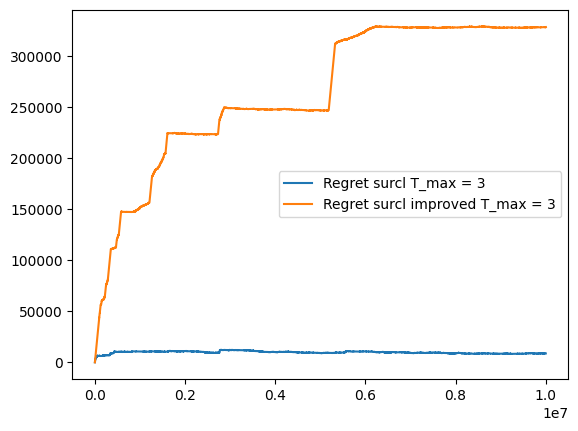

In [6]:
plt.plot(regret_sucrl, label = "Regret surcl T_max = 3")
plt.plot(regret_sucrl_imprv, label = "Regret surcl improved T_max = 3")
#plt.plot(regret_ucrl, label = "UCRL")

#plt.plot(regrets_bus, label = "BUS")
#plt.plot(regrets_bus2, label = "BUS2")
plt.legend()